# Exploratory Data Analysis
### Pathfinder spells dataset.

### Import dictionaries
### Most of these were added as I went, only when I needed them.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

## Let's import in our dataset.

In [2]:
# Obtain present working directory
cwd = os.getcwd()
df = pd.read_csv(cwd + '/spell_codex.csv')
# Standardize the symbol for empty data locations. Chose this for looking nice. To get this symbol, type alt + 0151
df.fillna('—', inplace=True)
# Drop a bunch of columns we don't need
df.drop(['Arc vs. Wiz vs. Sorc', 'Bard vs. Skald', 'Summoner vs. UnSummoner', 'Druid vs. Hunter', 'Hunter vs. Ranger', 
'Oracle vs. Cleric', 'Warpriest vs. Cleric', 'Alchemist vs. Investigator', 'Exclusive?', 'Potion/Oil Pre-Check', 
'Missing from Spell DB', 'Permanency?', 'Permanency CL', 'Permanency Cost', 'Mythic Text', 'Augmented',	'Haunt Statistics'], axis=1, inplace=True)
df.rename(columns={"Spell Name\n& AoN Hyperlink": "Spell Name"}, inplace=True)
# Replace all the long dashes with short ones, since the long dash does not play nicely with excel workbooks
df = df.replace('—','-')

df.head()

,Spell Name,Description,Rating,School,Subschool,Casting Time,Range,Area,Effect,Targets,...,[Shadow],[Sonic],[Water],SLA Level,Deity,Race,Cleric Domain,Druid Domain,Bloodline,Patron
0,Akashic Form,You create a perfect record of your physical b...,5,necromancy,-,hours (1),personal,-,-,you,...,-,-,-,9,-,-,-,-,-,-
1,Alchemical Allocation,This extract causes a pale aura to emanate fro...,5,transmutation,-,standard action,personal,-,-,you,...,-,-,-,2,-,-,-,-,-,-
2,Animate Dead,This spell turns corpses into undead skeletons...,5,necromancy,-,standard action,touch,-,-,corpse touched (1 or more),...,-,-,-,4,-,-,"Death (3), Souls (3)",-,Undead (9),Plague (8)
3,Ashen Path,You grant the creature touched the ability to ...,5,transmutation,-,standard action,touch,-,-,"creature touched, living (1)",...,-,-,-,-,-,-,-,-,-,-
4,Bestow Curse,You place a curse on the subject. Choose one o...,5,necromancy,-,standard action,touch,-,-,creature touched (1),...,-,-,-,4,-,-,"Curse (3), Tyranny (3)",-,"Accursed (9), Div (9)",-


In [3]:
# GEtting a list of columns that represent classes in pathfinder
class_cols = ['Arcanist', 'Wizard', 'Sorcerer', 'Witch', 'Magus', 'Bard', 'Skald', 'Summoner', 
'UnSummoner', 'Bloodrager', 'Shaman', 'Druid', 'Hunter', 'Ranger', 'Cleric', 'Oracle', 
'Warpriest', 'Inquisitor', 'Antipaladin', 'Paladin', 'Alchemist', 'Investigator', 'Psychic', 
'Mesmerist', 'Occultist', 'Spiritualist', 'Medium']
# For the possible future. If you use only specific sourcebooks, you can input that here and the dataset can be trimmed.
books_we_use = []





In [4]:
# There was a single case of the word being capitalized by accident
df = df.replace(to_replace="Transmutation", value="transmutation")

In [5]:
# Checking the percentage of spells that are rated 5 stars.
only_5 = df[df['Rating']==5]
percentage = (len(only_5)/len(df))*100
percentage

2.4671052631578947

### Out of all possible spells, very very few are rated 5/5. Only 2.5% of all spells.

In [6]:
only_1 = df[df['Rating']==1]
percentage = (len(only_1)/len(df))*100
percentage

27.039473684210524

### Whereas the percentage of 1/5 spells is almost a quarter of all spells.

## Say you want to build a specific character. You can filter the dataset down however you want!

### For example, if you want an illusion wizard, these are the spells you could use.

In [7]:
illusion_wizard = df[(df['Wizard']!= '—')&(df['School']=='illusion')]
illusion_wizard.head()

,Spell Name,Description,Rating,School,Subschool,Casting Time,Range,Area,Effect,Targets,...,[Shadow],[Sonic],[Water],SLA Level,Deity,Race,Cleric Domain,Druid Domain,Bloodline,Patron
44,Invisibility,The creature or object touched becomes invisib...,5,illusion,glamer,standard action,personal or touch,-,-,you or a creature or object (up to 100 pounds/...,...,-,-,-,2,-,-,Trickery (2),-,"Arcane (5), Djinni (5), Oni (5), Rakshasa (5)","Deception (4), Spirits (4)"
45,"Invisibility, Greater","This spell functions like invisibility, except...",5,illusion,glamer,standard action,personal or touch,-,-,you or creature touched (1),...,-,-,-,4,-,-,-,-,-,-
52,Mirror Image,This spell creates a number of illusory double...,5,illusion,figment,standard action,personal,-,-,you,...,-,-,-,2,-,-,Deception (2),-,-,Trickery (4)
61,Shades,"This spell functions like shadow conjuration, ...",5,illusion,shadow,standard action,see text,-,see text,-,...,1,-,-,9,-,-,Darkness (9),-,Shadow (19),Shadow (18)
63,Simulacrum,Simulacrum creates an illusory duplicate of an...,5,illusion,shadow,hours (12),feet (0),-,one duplicate creature,-,...,-,-,-,7,-,-,-,-,-,-


## Let's make a dataframe of spells for each class.

In [8]:
# Variable for moving the class name column to the front for each dataframe. 
i = 22
# List of columns so we can move them around
cols = list(df.columns.values)
# Get the filepath for a new folder, so we can save all of these as csv's later
filepath = (cwd + '\Individual Class Spell Lists')

for name in class_cols:
    # Using global variables so I can dynamically name the dataframes. Alchemist_spells, or Wizard_spells, for example.
    globals()[f'{name}_spells'] = df[((df[name] != '-'))]
    # Move the columns around to be nicer looking
    globals()[f'{name}_spells'] = globals()[f'{name}_spells'][cols[0:2] + [cols[i]] + cols[2:i] + cols[i+1:]]
    # Save them all as csv's to a new folder designated in the filepath
    (globals()[f'{name}_spells']).to_csv(filepath + '/' + name + '.csv')
    # Itterated the counter so the next class can be moved properly
    i = i+1
    

In [9]:
# Let's check the created dataframe for my favourite class
Druid_spells.head(10)

,Spell Name,Description,Druid,Rating,School,Subschool,Casting Time,Range,Area,Effect,...,[Shadow],[Sonic],[Water],SLA Level,Deity,Race,Cleric Domain,Druid Domain,Bloodline,Patron
3,Ashen Path,You grant the creature touched the ability to ...,2,5,transmutation,-,standard action,touch,-,-,...,-,-,-,-,-,-,-,-,-,-
16,Detect Magic,You detect magical auras. The amount of inform...,0,5,divination,-,standard action,feet (60),cone-shaped emanation,-,...,-,-,-,0,-,-,-,-,-,-
19,Dispel Magic,You can use dispel magic to end one ongoing sp...,4,5,abjuration,-,standard action,medium (100 feet + 10 feet/level),"one spellcaster, creature, or object",-,...,-,-,-,3,-,-,"Magic (3), Entropy (3)",-,Arcane (7),-
20,"Dispel Magic, Greater","This spell functions like dispel magic, except...",6,5,abjuration,-,standard action,medium (100 feet + 10 feet/level),20-foot-radius burst,-,...,-,-,-,6,-,-,Liberation (6),-,"Celestial (13), Oni (13)",-
25,Echolocation,You can perceive the world by creating high-pi...,4,5,transmutation,-,standard action,personal,-,-,...,-,1,-,5,-,-,-,Cave (4),Nanite (11),-
27,Elemental Swarm,This spell opens a portal to an Elemental Plan...,9,5,conjuration,summoning,minutes (10),medium (100 feet + 10 feet/level),-,"two or more summoned creatures, no two of whic...",...,-,-,-,9,-,-,"Air (9), Earth (9), Fire (9), Water (9)",-,Elemental (19),-
31,Freedom of Movement,This spell enables you or a creature you touch...,4,5,abjuration,-,standard action,personal or touch,-,-,...,-,-,-,4,-,-,"Liberation (4), Luck (4), Flowing (4)","Aquatic (4), Monkey (4)",Destined (9),Agility (8)
36,Heal,Heal enables you to channel positive energy in...,7,5,conjuration,healing,standard action,touch,-,-,...,-,-,-,6,-,-,Healing (6),-,-,-
58,Resist Energy,This abjuration grants a creature limited prot...,2,5,abjuration,-,standard action,touch,-,-,...,-,-,-,2,-,-,-,-,"Celestial (5), Draconic (5)",Winter (4)
59,"Resist Energy, Communal","This spell functions like resist energy, excep...",3,5,abjuration,-,standard action,touch,-,-,...,-,-,-,3,-,-,-,-,-,-


# Okay, time for some visuals

### How many spells of each spell school are there?

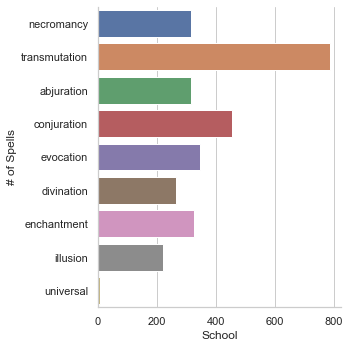

In [10]:
sns.catplot(
    y='School', 
    # Theres a spell or two that have the 'See text' school. Let's remove those
    data=df[df['School']!='see text'], 
    kind='count'
).set_axis_labels('School', '# of Spells')

### Let's do the same for a few different classes, just to see the difference in spread

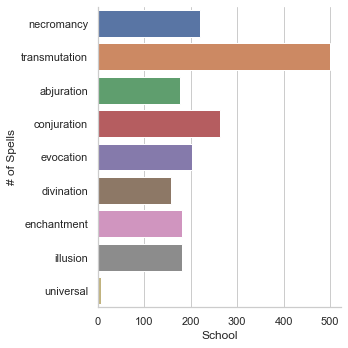

In [11]:
sns.catplot(
    y='School', 
    data=Arcanist_spells[Arcanist_spells['School']!='see text'], 
    kind='count'
).set_axis_labels('School', '# of Spells')

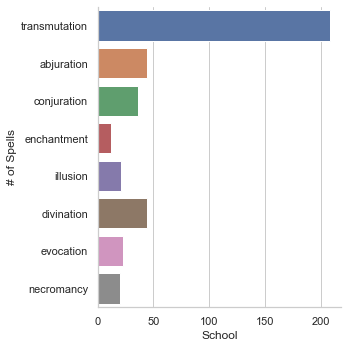

In [12]:
sns.catplot(
    y='School', 
    data=Alchemist_spells[Alchemist_spells['School']!='see text'], 
    kind='count'
).set_axis_labels('School', '# of Spells')

### Maybe the range of spells can be interesting

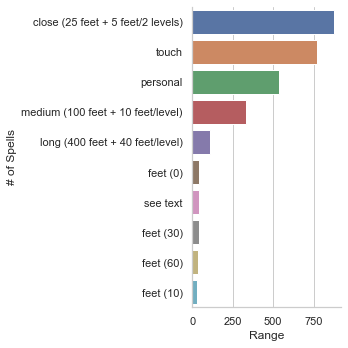

In [13]:
sns.catplot(
    y='Range', 
    data=df[df['School']!='see text'], 
    kind='count',
    order=df.Range.value_counts().iloc[:10].index
).set_axis_labels('Range', '# of Spells')

### As we can see, there are several ranges that are popular, and then it get's more unique fairly quickly

### Which sourcebook gave us the most new spells?

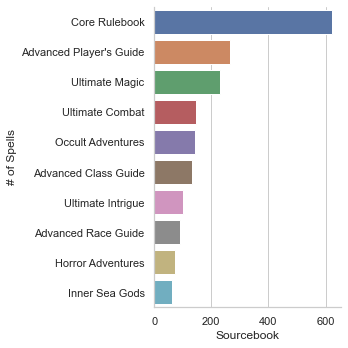

In [14]:
chart = sns.catplot(
    y='Sourcebook', 
    data=df, 
    kind='count',
    order=df.Sourcebook.value_counts().iloc[:10].index
).set_axis_labels('Sourcebook', '# of Spells')


## We're going to count the total number of spells each class has. To do that, we need to build a temporary dataframe

In [15]:
counts = pd.DataFrame(class_cols, columns = ['Class'])
counts['# of Spells'] = [len(df[df[x]!='-'])for x in class_cols]
counts

,Class,# of Spells
0,Arcanist,1892
1,Wizard,1897
2,Sorcerer,1885
3,Witch,1193
4,Magus,483
5,Bard,868
6,Skald,850
7,Summoner,414
8,UnSummoner,363
9,Bloodrager,340


<AxesSubplot:xlabel='# of Spells', ylabel='Class'>

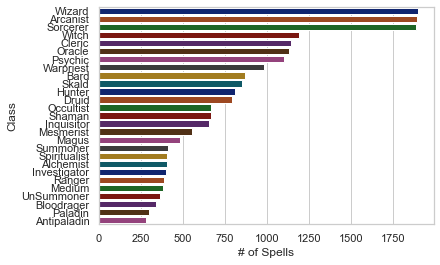

In [16]:
sns.barplot(
    y='Class', 
    x='# of Spells',
    data=counts.sort_values(by=['# of Spells'], ascending = False),
    palette = "dark"
)


### As might be expected, Wizard, Sorcerer and Arcanist have the most spells available

### Are there any race specific spells?

In [30]:
race_spells = df[df['Race']!='-']
race_spells = race_spells[cols[0:2] + [cols[79]] + cols[2:49]]

race_spells

,Spell Name,Description,Race,Rating,School,Subschool,Casting Time,Range,Area,Effect,...,Inquisitor,Antipaladin,Paladin,Alchemist,Investigator,Psychic,Mesmerist,Occultist,Spiritualist,Medium
53,Paragon Surge,"You surge with ancestral power, temporarily em...",Half-Elf,5,transmutation,polymorph,standard action,personal (see text),-,-,...,-,-,4,3,3,-,-,-,-,3
118,Bit of Luck,"For the spell's duration, the caster gains a r...",Catfolk,4,evocation,-,standard action,personal,-,-,...,-,-,-,4,4,4,-,-,-,-
147,Chains of Fire,"This spell functions like chain lightning, exc...",Ifrit,4,evocation,-,standard action,medium (100 feet + 10 feet/level),-,-,...,-,-,-,-,-,-,-,-,-,-
170,Curse of Befouled Fortune,"You curse the target, making it incredibly unl...",Catfolk,4,necromancy,-,standard action,touch,-,-,...,-,3,-,-,-,-,-,-,3,-
209,Escaping Ward,This ward grants you extra maneuverability whe...,Halfling,4,abjuration,-,standard action,personal,-,-,...,2,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,Urban Grace,"You become one with the city around you, allow...",Half-Elf,1,transmutation,-,standard action,personal,-,-,...,-,-,-,1,1,-,-,-,-,-
3014,Village Veil,You throw an illusion over an area to make cre...,Halfling,1,illusion,figment,standard action,long (400 feet + 40 feet/level),one 10-foot cube/level,-,...,-,-,-,-,-,5,5,-,-,-
3022,Waft,You make the targets light enough to be carrie...,Gathlain,1,transmutation,-,standard action,close (25 feet + 5 feet/2 levels),-,-,...,-,-,-,-,-,-,-,5,5,-
3032,Wing Thorns,Your wings sprout poisonous thorns each the si...,Gathlain,1,transmutation,-,standard action,personal,-,-,...,-,3,-,3,3,-,-,-,-,-


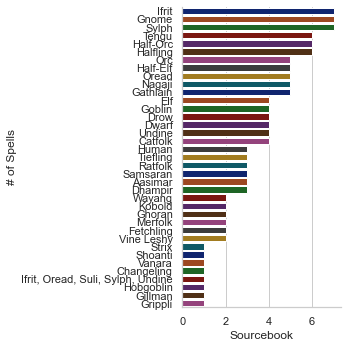

In [21]:
sns.catplot(
    y='Race', 
    data=race_spells, 
    kind='count',
    order=race_spells.Race.value_counts().iloc[:].index,
    palette = "dark"
).set_axis_labels('Sourcebook', '# of Spells')

### It turns out, Yes! We count them and apparently Ifrits (fire demon things), Gnomes (Big into illusions) and Tengu (Bird people) have the most.

# The rest here is just me playing around with things that might be interesting. 

In [23]:
domain_spells = df[(df['Cleric Domain'] != '-') | (df['Druid Domain'] != '-')]
domain_spells.head()

,Spell Name,Description,Rating,School,Subschool,Casting Time,Range,Area,Effect,Targets,...,[Shadow],[Sonic],[Water],SLA Level,Deity,Race,Cleric Domain,Druid Domain,Bloodline,Patron
2,Animate Dead,This spell turns corpses into undead skeletons...,5,necromancy,-,standard action,touch,-,-,corpse touched (1 or more),...,-,-,-,4,-,-,"Death (3), Souls (3)",-,Undead (9),Plague (8)
4,Bestow Curse,You place a curse on the subject. Choose one o...,5,necromancy,-,standard action,touch,-,-,creature touched (1),...,-,-,-,4,-,-,"Curse (3), Tyranny (3)",-,"Accursed (9), Div (9)",-
5,"Bestow Curse, Greater",You place a curse on the subject. Choose one o...,5,necromancy,-,standard action,touch,-,-,creature touched (1),...,-,-,-,8,-,-,Corruption (6),-,-,-
9,Break Enchantment,"This spell frees victims from enchantments, tr...",5,abjuration,-,minutes (1),close (25 feet + 5 feet/2 levels),-,-,creatures/level (1) all within 30 feet of each...,...,-,-,-,5,-,-,"Liberation (5), Luck (5), Restoration (5)",-,Destined (11),-
10,Breath of Life,This spell cures 5d8 points of damage + 1 poin...,5,conjuration,healing,standard action,touch,-,-,creature touched (1),...,-,-,-,5,-,-,Healing (5),Vulture (5),-,-
